In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Clustering

In [2]:
data =  pd.read_csv('2019_data.csv', encoding='utf-8', decimal=',')
data.shape
prob = data

In [3]:
#to give insight in the crimes per LSOA in 2019
crimerate = prob.groupby('LSOA code')['Month'].count()
#sum(crimerate.values)
crimerate

LSOA code
E01000001    359
E01000002    336
E01000003     68
E01000005    748
E01000006    110
            ... 
W01001897      1
W01001913      1
W01001938      1
W01001939      1
W01001941      1
Name: Month, Length: 13299, dtype: int64

In [4]:
#to get the cluster data for each lsoa once
prob = prob.drop_duplicates(subset="LSOA code", keep='first')

In [5]:
#remove the nan values
a = prob[prob['Employment Domain Score'].notna()]

In [6]:
### Get all the features columns except the class
features_lst = ['LSOA code','Employment Domain Score','Income Domain Score','IDACI Score','IDAOPI Score','Police Strength',
                'Police Funding','Population']


### Get the features data
data = a[features_lst].reset_index()

In [8]:
fit_data = data[['Employment Domain Score', 'Income Domain Score',
       'IDACI Score', 'IDAOPI Score', 'Police Strength', 'Police Funding',
       'Population']]

In [9]:
#remove the 1.101.360 -> this is not computable to float
fit_data['Population'] = fit_data['Population'].replace(['1.101.360'],'1101.360')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#replace the nan values with the mode of the column
for column in fit_data.columns:
    fit_data[column].fillna(fit_data[column].mode()[0], inplace=True)

C:\Users\20202201\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [43]:
fit_data

,Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,0.054,0.058,0.055,0.069,30.435,2572,154.414
1,0.146,0.216,0.276,0.231,30.435,2572,198.294
2,0.155,0.260,0.269,0.431,30.435,2572,198.294
3,0.075,0.113,0.126,0.145,30.435,2572,198.294
4,0.162,0.264,0.344,0.253,30.435,2572,198.294
...,...,...,...,...,...,...,...
13294,0.181,0.220,0.227,0.353,2.697,315,376.040
13295,0.148,0.230,0.395,0.402,2.697,315,376.040
13296,0.055,0.061,0.088,0.065,2.697,315,376.040
13297,0.086,0.096,0.125,0.115,2.697,315,376.040


# constrained clustering

In [17]:
from k_means_constrained import KMeansConstrained

In [18]:
clf = KMeansConstrained(n_clusters = 50, size_min=250, size_max=800,random_state=0)

In [19]:
clf.fit(fit_data)

KMeansConstrained(copy_x=True, init='k-means++', max_iter=300, n_clusters=50,
         n_init=10, n_jobs=1, random_state=0, size_max=800, size_min=250,
         tol=0.0001, verbose=False)

In [20]:
#make a new dataframe
label_data = pd.DataFrame({'LSOA code': data['LSOA code'], 'Cluster': clf.labels_})
#label_data

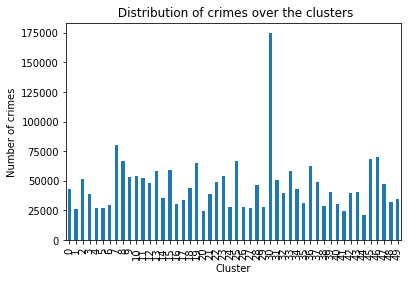

In [44]:
label_data.sort_values(by=['LSOA code'], inplace = True)
label_data['crime numb'] = crimerate.values
label_data.groupby('Cluster')['crime numb'].sum().plot(kind ='bar', ylabel='Number of crimes', 
                                                       title=' Distribution of crimes over the clusters');

## code for merging dataclusters

In [22]:
label_data.groupby('Cluster')

In [23]:
#makes a dataframe for each cluster
df = [x for _, x in label_data.groupby('Cluster')]
numbcrimes = []
for i in df:
    numbcrimes.append(i['crime numb'].sum())

(array([ 7., 11.,  7.,  5.,  9.,  3.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 21449.        ,  28118.60869565,  34788.2173913 ,  41457.82608696,
         48127.43478261,  54797.04347826,  61466.65217391,  68136.26086957,
         74805.86956522,  81475.47826087,  88145.08695652,  94814.69565217,
        101484.30434783, 108153.91304348, 114823.52173913, 121493.13043478,
        128162.73913043, 134832.34782609, 141501.95652174, 148171.56521739,
        154841.17391304, 161510.7826087 , 168180.39130435, 174850.        ]),
 <BarContainer object of 23 artists>)

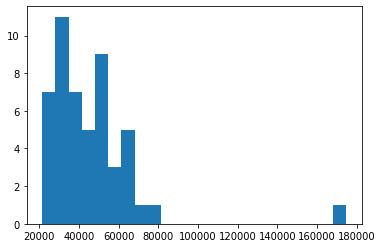

In [24]:
plt.hist(numbcrimes, bins=23)

In [25]:
cluster1 = df[2]['LSOA code'].values.tolist()
#cluster1

In [26]:
df_street = pd.read_csv('city-of-london_street.csv')
df_street.index = pd.to_datetime(df_street['Month'])
df_notna = df_street[df_street['LSOA code'].notna()]

In [37]:
df_notna = df_notna[df_notna['LSOA code'].isin(cluster1)]

In [39]:
data = df_notna.groupby(by=[df_notna.index.date])['Month'].count()
data

2013-03-01    1
2017-12-01    1
2018-08-01    1
2018-12-01    1
2019-08-01    1
2019-12-01    1
Name: Month, dtype: int64

# The sarima model

In [30]:
import datetime
import pmdarima as pm

In [40]:
# split the data into train and testdata and remove the covid data
for t in range(0,len(data.index)):
    if data.index[t] >= datetime.date(2019, 1, 1):
        break
for m in range(t+1, len(data.index)):
    if data.index[m] >= datetime.date(2020,1,1):
        break

data_train = data[:t]
data_test = data[t:m]

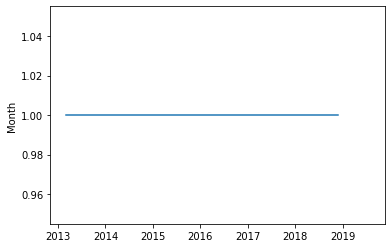

In [41]:
#plot the train test split
sns.lineplot(data=data_train)
sns.lineplot(data=data_test);

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
Sarima = pm.auto_arima(data_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Sarima.summary() 

In [ ]:
n_periods = 12
fitted, confint = Sarima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data_train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data_train)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA model for LSOA E01000001")
plt.plot(data_test)
plt.legend()
plt.show()